## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [2]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [14]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [15]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
PATIENCE=[5,10,25]

In [16]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping

results = {}
for pt in PATIENCE:
    earlystop = EarlyStopping(monitor="val_accuracy", 
                              patience=pt, 
                              verbose=1
                              )

    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with PT = %.6f" % (pt))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop])
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-pt-%s" % str(pt)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with PT = 5.000000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch 

50000/50000 [==============================] - 5s 98us/step - loss: 1.7558 - accuracy: 0.3880 - val_loss: 1.9743 - val_accuracy: 0.3068
Epoch 3/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.6285 - accuracy: 0.4317 - val_loss: 1.8370 - val_accuracy: 0.3687
Epoch 4/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.5533 - accuracy: 0.4580 - val_loss: 1.7398 - val_accuracy: 0.3969
Epoch 5/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.4971 - accuracy: 0.4801 - val_loss: 1.6649 - val_accuracy: 0.4279
Epoch 6/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.4504 - accuracy: 0.4958 - val_loss: 1.6049 - val_accuracy: 0.4354
Epoch 7/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.4112 - accuracy: 0.5095 - val_loss: 1.5630 - val_accuracy: 0.4532
Epoch 8/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.3749 - accuracy: 0.5206 - val_loss: 1.5432 - v

50000/50000 [==============================] - 5s 102us/step - loss: 1.2143 - accuracy: 0.5816 - val_loss: 1.4628 - val_accuracy: 0.4882
Epoch 15/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.1900 - accuracy: 0.5914 - val_loss: 1.4627 - val_accuracy: 0.4872
Epoch 16/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.1685 - accuracy: 0.5990 - val_loss: 1.4566 - val_accuracy: 0.4928
Epoch 17/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.1451 - accuracy: 0.6083 - val_loss: 1.4557 - val_accuracy: 0.4945
Epoch 18/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.1235 - accuracy: 0.6140 - val_loss: 1.4537 - val_accuracy: 0.4939
Epoch 19/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.1022 - accuracy: 0.6235 - val_loss: 1.4503 - val_accuracy: 0.4975
Epoch 20/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.0805 - accuracy: 0.6314 - val_loss:

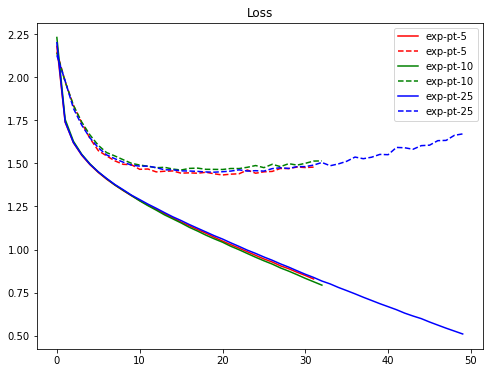

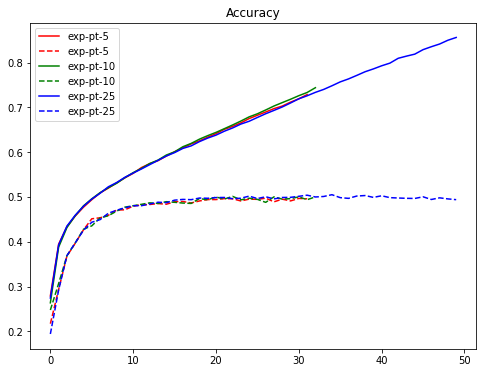

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()